In [72]:
from influxdb import DataFrameClient
import pandas as pd
import sqlite3
import os
import keras
%matplotlib inline

In [26]:
# os.environ["influx_pw"] = "password"
# os.environ['influx_user'] = 'uname'
os.environ.get('influx_user')

In [27]:
db = DataFrameClient(host = '192.168.1.24', username = 'admin', password =os.environ.get("influx_pw"))

In [28]:
db.get_list_database()

[{'name': '_internal'}, {'name': 'home_assistant'}, {'name': 'glances'}]

In [68]:
timeFilter = 'time >= 1577382826582ms and time <= 1577398809205ms'

In [76]:
temp = db.query(f'SELECT mean("value") FROM "°F" WHERE ("entity_id" =~ /su/) AND {timeFilter} GROUP BY time(15s), "entity_id" fill(previous);',database='home_assistant')
state = db.query(f'SELECT mean("value") *100 FROM "state" WHERE ("entity_id" =~ /suviderelay/) AND {timeFilter} GROUP BY time(15s) fill(previous);',database='home_assistant')


In [78]:
state['state']

,mean
2019-12-26 17:53:45+00:00,NaN
2019-12-26 17:54:00+00:00,NaN
2019-12-26 17:54:15+00:00,NaN
2019-12-26 17:54:30+00:00,NaN
2019-12-26 17:54:45+00:00,NaN
2019-12-26 17:55:00+00:00,NaN
2019-12-26 17:55:15+00:00,NaN
2019-12-26 17:55:30+00:00,NaN
2019-12-26 17:55:45+00:00,NaN
2019-12-26 17:56:00+00:00,NaN


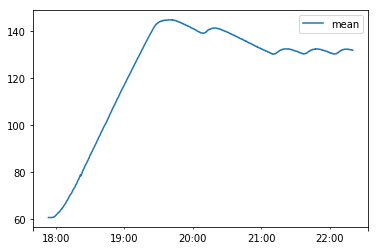

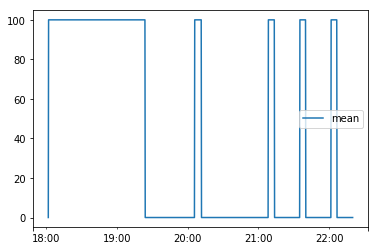

In [79]:
temp[('°F', (('entity_id', 'su_vide_temp'),))].plot()
state['state'].plot()

In [ ]:
results['example'].describe()